In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Calculate the Last Date in Dataset
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Show Query Results
max_date

('2017-08-23')

In [12]:
# Find a Year from  the End of Data
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Select Session Query Parameters
sel = [Measurement.date, Measurement.prcp]

# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_precip = session.query(*sel).filter(Measurement.date >= last_year).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(last_12_precip, columns = ["Date", "Precipitation"]).set_index("Date")

# Show DataDrame
precip.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


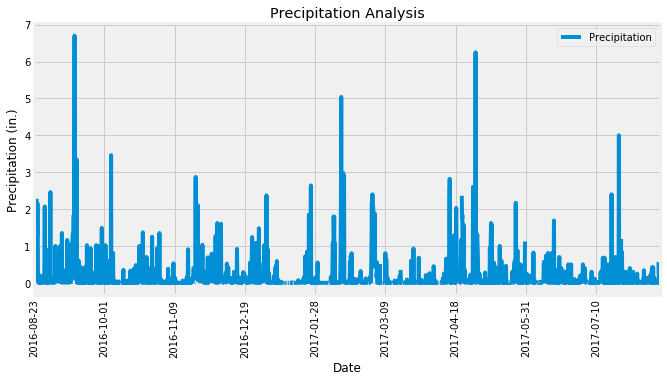

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
precip.plot(title="Precipitation Analysis", figsize=(10,5))

# Plot Legend
plt.legend(loc='upper right')

# Plot X Ticks
plt.xticks(rotation="vertical")

# Plot Y Label
plt.ylabel("Precipitation (in.)")

# Show Plot
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to calculate the total number of stations.
station_count = session.query(Station.station).count()

# Show Query Results
station_count

9

In [16]:
# Set Station Name to Variable
station_name = Measurement.station

# Set Station Count to Variable
station_count = func.count(Measurement.station)

# Select Session Query Parameters
sel = [station_name, station_count]
    
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
station_activity = session.query(*sel).group_by(station_name).order_by(station_count.desc()).all()

# Show Query Results
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Select Session Query Parameters
sel = [station_name, station_count]

# Which station has the highest number of observations?
most_active_station = session.query(*sel).group_by(station_name).order_by(station_count.desc()).first()

# Show Query Results
most_active_station

('USC00519281', 2772)

In [18]:
# Select Session Query Parameters
sel = [station_name, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

# Design a query to retrieve the min, average, and max temperatures for the most active station.
min_avg_max = session.query(*sel).filter(Measurement.date >= last_year).filter(Measurement.station == most_active_station[0]).all()

# Show Query Results
min_avg_max

[('USC00519281', 59.0, 73.10795454545455, 83.0)]

In [19]:
# Select Session Query Parameters
sel = [Measurement.date, Measurement.tobs]

# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations
last_12_tobs = session.query(*sel).filter(Measurement.date >= last_year).filter(Measurement.station == most_active_station[0]).order_by(Measurement.date).all()

# Show Query Results
last_12_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tob = pd.DataFrame(last_12_tobs, columns = ["Date", "TOBS"]).set_index("Date")

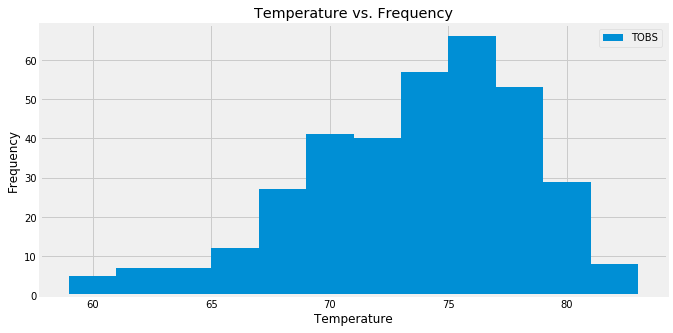

In [21]:
# Plot the results as a histogram with bins=12
# Create Histogram
tob["TOBS"].plot.hist(bins=12, title="Temperature vs. Frequency", figsize=(10,5))

# Plot X Label
plt.xlabel("Temperature")

# Plot Y Label
plt.ylabel("Frequency")

# Plot Legend
plt.legend(loc="upper right")

# Show Histogram
plt.show()

## Bonus Challenge Assignment

In [22]:
# Read Measurement and Station Data
measurement_data = pd.read_csv("Resources/hawaii_measurements.csv")
station_data = pd.read_csv("Resources/hawaii_stations.csv")

In [23]:
# Assign Date Column to a Variable
all_dates = measurement_data["date"]

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%Y-%m-%d") for x in all_dates]

# Replace Date Column with Datetime Values
measurement_data["date"] = pd.to_datetime(all_dates)

In [24]:
# Create Empty Lists to Store Temperatures
june = []
december = []

# Create a For Loop to get Temperatures
for x in range(measurement_data["tobs"].count()):    
    if measurement_data["date"].dt.month[x] == 6:
        june.append(measurement_data["tobs"][x])
    elif measurement_data["date"].dt.month[x] == 12:
        december.append(measurement_data["tobs"][x])

In [25]:
# Independent T Test
stats.ttest_ind(june, december, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

## Bonus Challenge Assignment 2

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
     Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# calc_temp for my Vacation
vacay = calc_temps('2017-06-27', '2017-07-07')

# Create DataFrame
vacation = pd.DataFrame(vacay, columns=["min", "avg", "max"])

# Display DataFrame
vacation

,min,avg,max
0,74.0,77.742424,87.0


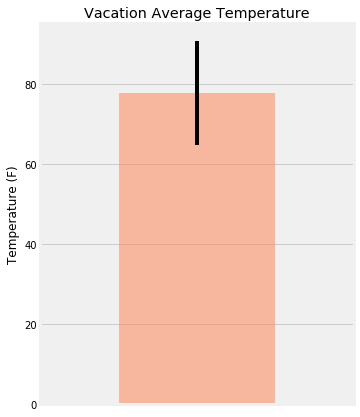

In [28]:
# Create Bar Plot
vacation.plot.bar(y="avg", yerr=(vacation["max"] - vacation["min"]),title="Vacation Average Temperature", color="coral", alpha=0.5, figsize=(5,7), legend=None)

# Plot X Ticks
plt.xticks([])

# Plot Y Label
plt.ylabel("Temperature (F)")

# Show Graph
plt.show()

In [29]:
# Set Start Date
start_date = '2017-06-27'

# Set End Date
end_date ='2017-07-07'

# Create Range of Dates
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()
trip_dates = [x[0] for x in dates]

# Strip Off Year
stripped_trip_dates = [x[5:] for x in trip_dates]

# Find Start Day
start_day = stripped_trip_dates[0]

# Find End Day
end_day = stripped_trip_dates[-1]

# Find Daily Normals
daily_normals = [session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_day).filter(func.strftime("%m-%d", Measurement.date) <= end_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]
daily_normals = daily_normals[0]

# Print Daily Normals
print("Aggregate Daily Normals for 06-27 to 07-07:")
daily_normals

Aggregate Daily Normals for 06-27 to 07-07:


[(66.0, 75.01785714285714, 81.0),
 (69.0, 74.88679245283019, 80.0),
 (67.0, 74.91525423728814, 80.0),
 (67.0, 75.59615384615384, 81.0),
 (67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0)]

In [30]:
# Create DataFrame from Daily Normals
d_normals = pd.DataFrame(daily_normals,columns=["tmin", "tavg", "tmax"])

# Add Date Column
d_normals["date"] = trip_dates

# Convert Date Column to Datetime
d_normals["date"] = pd.to_datetime(d_normals["date"], format='%Y-%m-%d')

# Set Index to Date
d_normals.set_index("date",inplace=True)

d_normals

,tmin,tavg,tmax
date,,,
2017-06-27,66.0,75.017857,81.0
2017-06-28,69.0,74.886792,80.0
2017-06-29,67.0,74.915254,80.0
2017-06-30,67.0,75.596154,81.0
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0


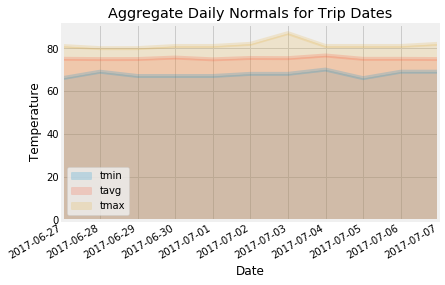

In [31]:
# Plot the daily normals as an area plot with `stacked=False`
d_normals.plot(kind="area", alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")

# Plot Y Label
plt.ylabel("Temperature")

# Plot X Label
plt.xlabel("Date")

# Show Graph
plt.show()